In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles



(-1.2605476389405375,
 1.3090125494270053,
 -1.433828483962579,
 1.2926212050525656)

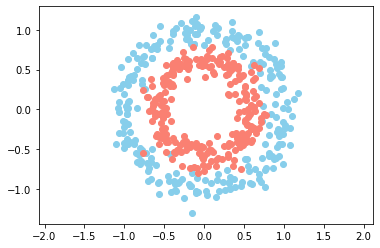

In [2]:
#Crear Data set

n = 500
p = 2
X, Y = make_circles(n_samples=n, factor =0.6, noise=0.1, random_state=True)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1], c = "skyblue")
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1], c = "salmon")
plt.axis("equal")

In [3]:
#Clase de la capa
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)*2 - 1
    self.W = np.random.rand(n_conn, n_neur)*2 - 1
    
    
    

In [4]:
#Funciones de activacion

#introduce no linealidades para juntar varias neuronas
sigm = (lambda x: 1 / (1 + np.e**(-x)),
        lambda x: x * (1-x))
relu = (lambda x: np.maximum(0,x),lambda x: x)

_x = np.linspace(-5,5,100)



In [5]:


def create_nn(topo, act_f):
  nn = [] # Vector para capas
  for l, layer in enumerate(topo[:-1]):
    nn.append(neural_layer(topo[l],topo[l+1], act_f))
  return nn



In [6]:
topo = [p, 4, 8, 1]
neural_net = create_nn(topo, sigm)
cost = (lambda yp, yr: np.mean((yp-yr)**2),
        lambda yp, yr: (yp-yr))
def train (neural_net, X, Y, cost, lr = 0.5,train = True):
  out = [(None, X)]
  # Forward Pass
  # pasar vector de entrada, capa por capa y realizar suma ponderada en cada
  # neurona y despues evaluar el valor de la suma ponderada en la función de
  # activación
  for l, layer in enumerate(neural_net):
    
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #suma ponderada
    a = neural_net[l].act_f[0](z)
    
    out.append((z,a))
  
  if train:
    #Backward
    deltas = []
    
    for l in reversed(range(0,len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      #print (a.shape)
      
      if l == len(neural_net) - 1:
        deltas.insert(0, cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))  
        
      _W = neural_net[l].W
      
      # Decenso del gradiente
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, 
                                                 keepdims = True)*lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0]*lr
  return out[-1][1]


      
      
train(neural_net, X, Y, cost, 0.5)

array([[0.34053916],
       [0.34851467],
       [0.3366841 ],
       [0.34613599],
       [0.34069726],
       [0.33903028],
       [0.34422588],
       [0.33277654],
       [0.33248328],
       [0.35214609],
       [0.34444728],
       [0.35854072],
       [0.35723992],
       [0.34389958],
       [0.34095257],
       [0.35738663],
       [0.35079589],
       [0.34057927],
       [0.36547177],
       [0.36254647],
       [0.33990047],
       [0.34149799],
       [0.34487341],
       [0.33968816],
       [0.34311646],
       [0.35595766],
       [0.33397387],
       [0.35207217],
       [0.35900409],
       [0.34745236],
       [0.35519059],
       [0.34310068],
       [0.33367128],
       [0.35005787],
       [0.35034062],
       [0.3600465 ],
       [0.3350869 ],
       [0.33148731],
       [0.35698211],
       [0.35161011],
       [0.34768063],
       [0.3505178 ],
       [0.34489956],
       [0.34204869],
       [0.34769283],
       [0.34850634],
       [0.33878202],
       [0.353

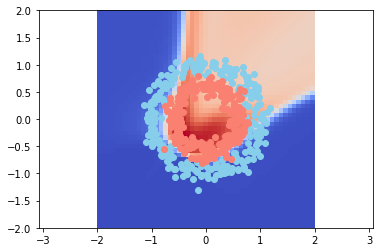

In [15]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topo, sigm)

loss = []

for i in range(2000):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, cost, lr=0.08)
  
  if i % 50 == 0:
    
  #  print(pY)
  
    loss.append(cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-2, 2, res)
    _x1 = np.linspace(-2, 2, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    #plt.show()
    #plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.1)  
    